# PCA ANALYSIS ON MNIST DATASET

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# LOAD MINSNT DATASET

In [18]:
d0 = pd.read_csv('./mnist_train.csv')

In [19]:
print (d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [20]:
l = d0['label']

In [21]:
d = d0.drop ("label" , axis = 1)

In [22]:
print (d.shape)
print (l.shape)

(42000, 784)
(42000,)


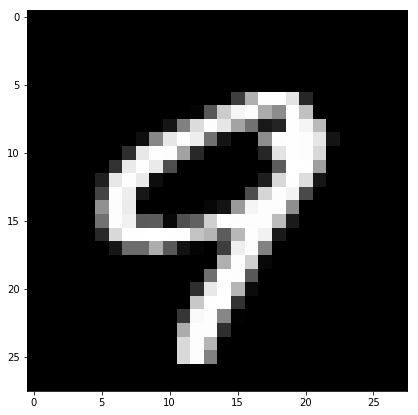

9


In [23]:
#display plot number

plt.figure (figsize = (7,7))
idx = 100
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow (grid_data , interpolation = "none" , cmap = "gray" )
plt.show()
print (l[idx])

# 2D VISUALIZATION USING PCA

In [24]:
labels = l.head(15000)
data = d.head(15000)

print ("The shape of sample data = " , data.shape)


The shape of sample data =  (15000, 784)


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
standardized_data = StandardScaler().fit_transform(data)
print (standardized_data.shape)

(15000, 784)


In [27]:
#Find covariance matrix 
sample_data = standardized_data

#matrix multipication using numpy
covar_matrix = np.matmul (sample_data.T , sample_data)
print ("The shape of variance matrix is = " , covar_matrix.shape)

The shape of variance matrix is =  (784, 784)


In [28]:
#finding top two eigen values and eigen vectors for projecting into 2 dimension space

from scipy.linalg import eigh

values , vectors = eigh (covar_matrix , eigvals = (782, 783))

print ("Shape of eigen vectors" , vectors.shape)

vectors = vectors.T
 
print ("Updated shape of eigen vectors" , vectors.shape)

Shape of eigen vectors (784, 2)
Updated shape of eigen vectors (2, 784)


In [29]:
#projecting sample data on sample plane

import matplotlib.pyplot as plt

new_coordinates = np.matmul (vectors , sample_data.T)

print ("Resultant new data points " , vectors.shape  , "X" , sample_data.T.shape," = ", new_coordinates.shape)

Resultant new data points  (2, 784) X (784, 15000)  =  (2, 15000)


In [30]:
import pandas as pd

new_coordinates = np.vstack ((new_coordinates, labels)).T

vstack is used to stack arrays vertically

In [35]:
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


# PLOTTING 2D DataPoints with seaborn


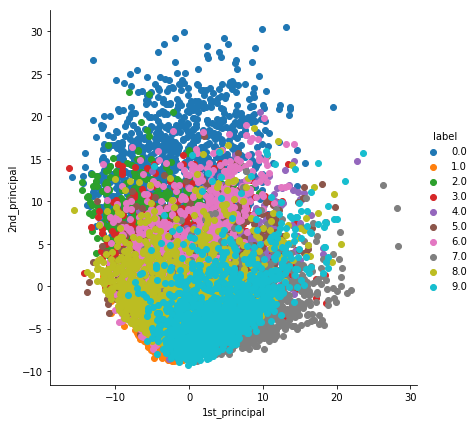

In [36]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using SCIKIT LEARN


In [37]:
from sklearn import decomposition
pca = decomposition.PCA()


In [38]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (15000, 2)


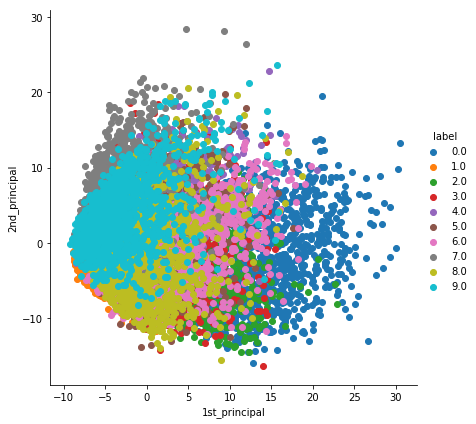

In [39]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()